# Clustering the Spotify Data

<b> Cluster the spotify data we collected by similar features in order to later recommend a similar song

In [88]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import spotipy
import config
import json
from spotipy.oauth2 import SpotifyClientCredentials
import random

<b> Input personal ID and passcode and import previous data frames

In [89]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [90]:
features_df = pd.read_csv('features_data')
features_df = features_df.drop(['Unnamed: 0'], axis=1)
all_music_df = pd.read_csv('all_music_data')
all_music_df

,Unnamed: 0,song_title,artist,id,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Hey Ya!,Outkast,0JFx4l1JZJ6XtMAtlCMiqF,0.657,0.883,4,-6.778,0,0.0526,...,0.000000,0.3060,0.966,79.397,audio_features,spotify:track:0JFx4l1JZJ6XtMAtlCMiqF,https://api.spotify.com/v1/tracks/0JFx4l1JZJ6X...,https://api.spotify.com/v1/audio-analysis/0JFx...,228573,4
1,1,"No Woman, No Cry",Fugees,5bUVHuzQh5mkvMPjUU074i,0.846,0.326,0,-13.909,1,0.1520,...,0.000040,0.2800,0.367,88.988,audio_features,spotify:track:5bUVHuzQh5mkvMPjUU074i,https://api.spotify.com/v1/tracks/5bUVHuzQh5mk...,https://api.spotify.com/v1/audio-analysis/5bUV...,273093,4
2,2,Can You Feel It,The Jacksons,1XqgxhR3FcJXzFiSG8m6oL,0.892,0.638,6,-7.468,0,0.0488,...,0.000476,0.2020,0.892,125.359,audio_features,spotify:track:1XqgxhR3FcJXzFiSG8m6oL,https://api.spotify.com/v1/tracks/1XqgxhR3FcJX...,https://api.spotify.com/v1/audio-analysis/1Xqg...,358373,4
3,3,Foolish,Ashanti,5wXgj9h0Pc36Rcgwf2qd7A,0.620,0.701,0,-5.742,1,0.0624,...,0.000000,0.1470,0.771,90.059,audio_features,spotify:track:5wXgj9h0Pc36Rcgwf2qd7A,https://api.spotify.com/v1/tracks/5wXgj9h0Pc36...,https://api.spotify.com/v1/audio-analysis/5wXg...,229013,4
4,4,Arigato Interlude,Ms. Lauryn Hill,3abz5HTatP9iv5p8Nm5IT0,0.000,0.978,10,-9.615,1,0.0000,...,0.002280,0.9510,0.000,0.000,audio_features,spotify:track:3abz5HTatP9iv5p8Nm5IT0,https://api.spotify.com/v1/tracks/3abz5HTatP9i...,https://api.spotify.com/v1/audio-analysis/3abz...,34182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7312,7312,XO,John Mayer,0hm785gGfLmHvl9YesZcFP,0.431,0.377,2,-9.753,1,0.0288,...,0.000000,0.2110,0.353,173.670,audio_features,spotify:track:0hm785gGfLmHvl9YesZcFP,https://api.spotify.com/v1/tracks/0hm785gGfLmH...,https://api.spotify.com/v1/audio-analysis/0hm7...,213627,4
7313,7313,Un-Break My Heart,Toni Braxton,5CYbKUBECU71XChJBP01KE,0.620,0.417,11,-9.166,0,0.0286,...,0.000000,0.0984,0.133,109.904,audio_features,spotify:track:5CYbKUBECU71XChJBP01KE,https://api.spotify.com/v1/tracks/5CYbKUBECU71...,https://api.spotify.com/v1/audio-analysis/5CYb...,271467,4
7314,7314,God Is a DJ,Faithless,76QhWAnwj7aSgAYPOPNXYN,0.604,0.893,10,-7.480,0,0.0453,...,0.900000,0.1570,0.366,130.555,audio_features,spotify:track:76QhWAnwj7aSgAYPOPNXYN,https://api.spotify.com/v1/tracks/76QhWAnwj7aS...,https://api.spotify.com/v1/audio-analysis/76Qh...,207613,4
7315,7315,I Wanna Be Adored - Remastered,The Stone Roses,5vnMGVPld0mhqVVHMK89y3,0.502,0.860,4,-9.251,0,0.0278,...,0.240000,0.2160,0.559,112.585,audio_features,spotify:track:5vnMGVPld0mhqVVHMK89y3,https://api.spotify.com/v1/tracks/5vnMGVPld0mh...,https://api.spotify.com/v1/audio-analysis/5vnM...,292413,4


In [91]:
features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.657,0.883,4,-6.778,0,0.0526,0.0349,0.000000,0.3060,0.966,79.397,audio_features,0JFx4l1JZJ6XtMAtlCMiqF,spotify:track:0JFx4l1JZJ6XtMAtlCMiqF,https://api.spotify.com/v1/tracks/0JFx4l1JZJ6X...,https://api.spotify.com/v1/audio-analysis/0JFx...,228573,4
1,0.846,0.326,0,-13.909,1,0.1520,0.0134,0.000040,0.2800,0.367,88.988,audio_features,5bUVHuzQh5mkvMPjUU074i,spotify:track:5bUVHuzQh5mkvMPjUU074i,https://api.spotify.com/v1/tracks/5bUVHuzQh5mk...,https://api.spotify.com/v1/audio-analysis/5bUV...,273093,4
2,0.892,0.638,6,-7.468,0,0.0488,0.0445,0.000476,0.2020,0.892,125.359,audio_features,1XqgxhR3FcJXzFiSG8m6oL,spotify:track:1XqgxhR3FcJXzFiSG8m6oL,https://api.spotify.com/v1/tracks/1XqgxhR3FcJX...,https://api.spotify.com/v1/audio-analysis/1Xqg...,358373,4
3,0.620,0.701,0,-5.742,1,0.0624,0.3160,0.000000,0.1470,0.771,90.059,audio_features,5wXgj9h0Pc36Rcgwf2qd7A,spotify:track:5wXgj9h0Pc36Rcgwf2qd7A,https://api.spotify.com/v1/tracks/5wXgj9h0Pc36...,https://api.spotify.com/v1/audio-analysis/5wXg...,229013,4
4,0.000,0.978,10,-9.615,1,0.0000,0.7990,0.002280,0.9510,0.000,0.000,audio_features,3abz5HTatP9iv5p8Nm5IT0,spotify:track:3abz5HTatP9iv5p8Nm5IT0,https://api.spotify.com/v1/tracks/3abz5HTatP9i...,https://api.spotify.com/v1/audio-analysis/3abz...,34182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042,0.431,0.377,2,-9.753,1,0.0288,0.7490,0.000000,0.2110,0.353,173.670,audio_features,0hm785gGfLmHvl9YesZcFP,spotify:track:0hm785gGfLmHvl9YesZcFP,https://api.spotify.com/v1/tracks/0hm785gGfLmH...,https://api.spotify.com/v1/audio-analysis/0hm7...,213627,4
7043,0.620,0.417,11,-9.166,0,0.0286,0.4150,0.000000,0.0984,0.133,109.904,audio_features,5CYbKUBECU71XChJBP01KE,spotify:track:5CYbKUBECU71XChJBP01KE,https://api.spotify.com/v1/tracks/5CYbKUBECU71...,https://api.spotify.com/v1/audio-analysis/5CYb...,271467,4
7044,0.604,0.893,10,-7.480,0,0.0453,0.1750,0.900000,0.1570,0.366,130.555,audio_features,76QhWAnwj7aSgAYPOPNXYN,spotify:track:76QhWAnwj7aSgAYPOPNXYN,https://api.spotify.com/v1/tracks/76QhWAnwj7aS...,https://api.spotify.com/v1/audio-analysis/76Qh...,207613,4
7045,0.502,0.860,4,-9.251,0,0.0278,0.0123,0.240000,0.2160,0.559,112.585,audio_features,5vnMGVPld0mhqVVHMK89y3,spotify:track:5vnMGVPld0mhqVVHMK89y3,https://api.spotify.com/v1/tracks/5vnMGVPld0mh...,https://api.spotify.com/v1/audio-analysis/5vnM...,292413,4


In [92]:
X = features_df._get_numeric_data()
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.657,0.883,4,-6.778,0,0.0526,0.0349,0.000000,0.3060,0.966,79.397,228573,4
1,0.846,0.326,0,-13.909,1,0.1520,0.0134,0.000040,0.2800,0.367,88.988,273093,4
2,0.892,0.638,6,-7.468,0,0.0488,0.0445,0.000476,0.2020,0.892,125.359,358373,4
3,0.620,0.701,0,-5.742,1,0.0624,0.3160,0.000000,0.1470,0.771,90.059,229013,4
4,0.000,0.978,10,-9.615,1,0.0000,0.7990,0.002280,0.9510,0.000,0.000,34182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042,0.431,0.377,2,-9.753,1,0.0288,0.7490,0.000000,0.2110,0.353,173.670,213627,4
7043,0.620,0.417,11,-9.166,0,0.0286,0.4150,0.000000,0.0984,0.133,109.904,271467,4
7044,0.604,0.893,10,-7.480,0,0.0453,0.1750,0.900000,0.1570,0.366,130.555,207613,4
7045,0.502,0.860,4,-9.251,0,0.0278,0.0123,0.240000,0.2160,0.559,112.585,292413,4


<b> Scale numeric data and drop irrelevant columns

In [93]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_df.drop(columns=['duration_ms'])
X_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.415417,1.249522,-0.362613,0.443380,-1.321881,-0.355766,-0.835826,-0.275101,0.526345,1.716582,-1.204536,-0.153561,0.215586
1,1.531493,-1.257792,-1.477869,-1.547937,0.756498,0.527447,-0.907002,-0.274858,0.384263,-0.653931,-0.875056,0.331291,0.215586
2,1.803130,0.146664,0.195016,0.250699,-1.321881,-0.389531,-0.804045,-0.272194,-0.041981,1.423730,0.374398,1.260047,0.215586
3,0.196926,0.430256,-1.477869,0.732681,0.756498,-0.268689,0.094755,-0.275101,-0.342538,0.944879,-0.838264,-0.148770,0.215586
4,-3.464274,1.677161,1.310272,-0.348846,0.756498,-0.823141,1.693727,-0.261180,4.051058,-2.106315,-3.932062,-2.270609,-9.762974
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042,-0.919149,-1.028218,-0.920241,-0.387382,0.756498,-0.567240,1.528202,-0.275101,0.007201,-0.709335,2.034027,-0.316333,0.215586
7043,0.196926,-0.848159,1.589086,-0.223464,-1.321881,-0.569017,0.422495,-0.275101,-0.608121,-1.579974,-0.156528,0.313583,0.215586
7044,0.102444,1.294537,1.310272,0.247348,-1.321881,-0.420630,-0.372025,5.219905,-0.287891,-0.657889,0.552896,-0.381830,0.215586
7045,-0.499883,1.145989,-0.362613,-0.247200,-1.321881,-0.576125,-0.910644,1.190234,0.034524,0.105899,-0.064427,0.541699,0.215586


### Create a function to fit the K-Means clustering method using all songs

In [94]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [95]:
len(kmeans.labels_)

7047

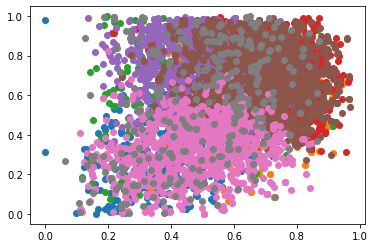

In [96]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)

# retrieve unique clusters
clusters = np.unique(labels)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 0], X.to_numpy()[row_ix, 1])
    # show the plot
pyplot.show()

### Optimising K

### Elbow method to find optimum k

In [97]:
kmeans.inertia_

53286.31317694338

In [98]:
kmeans2 = KMeans(n_clusters=50,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

29380.677298504357


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

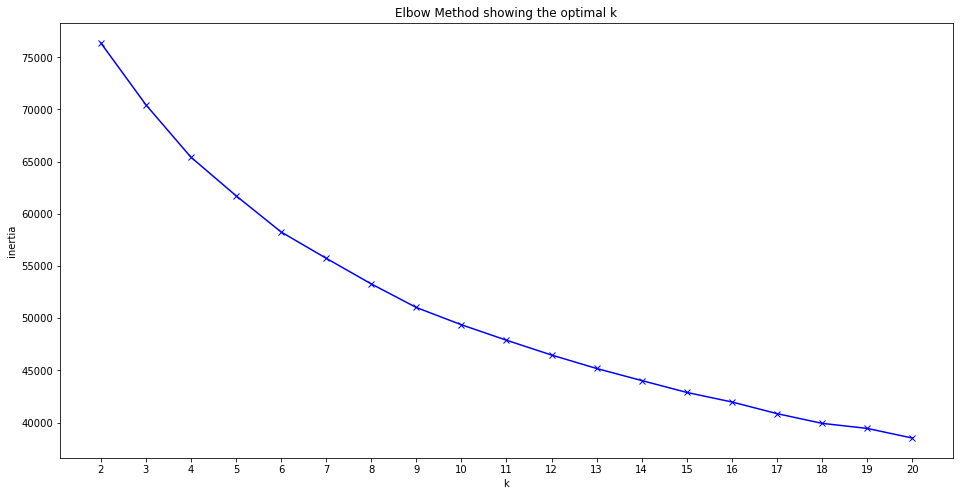

In [99]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette method to find optimum k

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

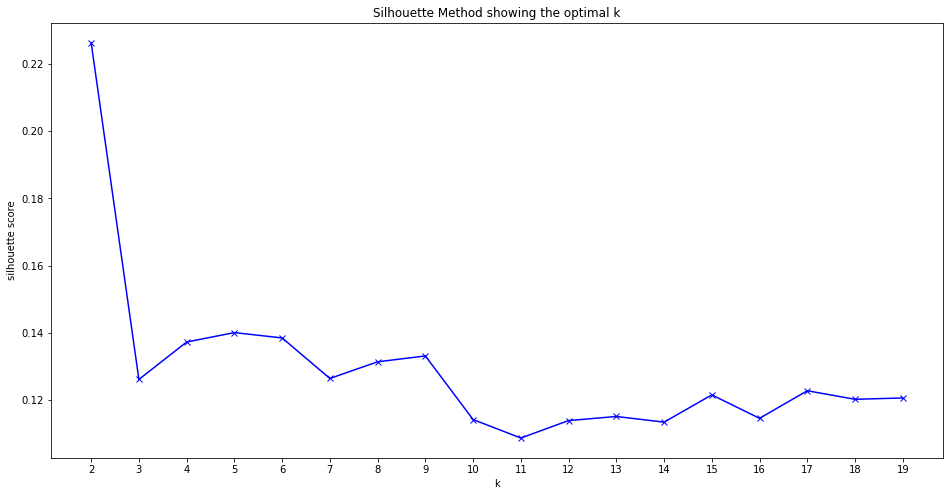

In [100]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

<b> Optimum K is 5:

In [101]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=5, random_state=1234)

In [102]:
clusters = kmeans.predict(X_scaled_df)

In [103]:
X["cluster"] = clusters
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.657,0.883,4,-6.778,0,0.0526,0.0349,0.000000,0.306,0.966,79.397,228573,4,2
1,0.846,0.326,0,-13.909,1,0.1520,0.0134,0.000040,0.280,0.367,88.988,273093,4,3
2,0.892,0.638,6,-7.468,0,0.0488,0.0445,0.000476,0.202,0.892,125.359,358373,4,2
3,0.620,0.701,0,-5.742,1,0.0624,0.3160,0.000000,0.147,0.771,90.059,229013,4,3
4,0.000,0.978,10,-9.615,1,0.0000,0.7990,0.002280,0.951,0.000,0.000,34182,0,4


In [104]:
X[X['cluster'] == 2]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.657,0.883,4,-6.778,0,0.0526,0.0349,0.000000,0.3060,0.966,79.397,228573,4,2
2,0.892,0.638,6,-7.468,0,0.0488,0.0445,0.000476,0.2020,0.892,125.359,358373,4,2
7,0.825,0.586,4,-6.044,0,0.3360,0.0901,0.000000,0.0635,0.611,78.030,202760,4,2
9,0.716,0.568,4,-7.016,0,0.1980,0.4670,0.000082,0.0934,0.265,113.954,237900,4,2
14,0.669,0.519,11,-9.932,0,0.2780,0.0714,0.000021,0.1080,0.825,159.877,342200,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,0.824,0.457,0,-8.624,0,0.0330,0.7870,0.000033,0.0783,0.923,104.429,206987,4,2
7020,0.531,0.517,4,-7.619,0,0.0459,0.3250,0.000663,0.0881,0.480,78.987,122611,4,2
7024,0.486,0.751,1,-5.020,0,0.0417,0.0182,0.000000,0.3720,0.546,145.609,210867,4,2
7027,0.731,0.503,3,-6.227,0,0.0313,0.2070,0.000000,0.1050,0.746,116.821,193287,4,2


In [105]:
max(clusters)

4

### User entry

In [106]:
def user_song_entry():
    """Take users song and return the spotify song id"""
    
    user_song_title = input("Enter a song: ")
    user_song_id = sp.search(q='track:' + user_song_title, type='track')
    user_song_id = user_song_id['tracks']['items'][0]['id']
    return user_song_id

In [107]:
user_song_id = user_song_entry()

Enter a song: imagine


In [108]:
user_song_id

'7pKfPomDEeI4TPT6EOYjn9'

In [109]:
# get the features from spotify using the song id
user_features = pd.DataFrame(sp.audio_features(user_song_id))
user_X = user_features._get_numeric_data()
user_X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.547,0.257,0,-12.358,1,0.0252,0.907,0.183,0.0935,0.169,75.752,187867,4


In [110]:
# scale the song features
user_features_scaled = scaler.transform(user_X)
user_features_scaled = pd.DataFrame(user_features_scaled, columns=user_X.columns)
user_features_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.23415,-1.568393,-1.477869,-1.114823,0.756498,-0.599227,2.051261,0.842217,-0.634898,-1.437506,-1.329752,-0.596877,0.215586


### Cluster the user's song choice

In [111]:
# find cluster of the song choice
cluster_number = kmeans.predict(user_features_scaled)[0]
cluster_number

1

In [112]:
chosen_cluster = X[X['cluster'] == cluster_number]
chosen_cluster

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
5,0.219,0.262,0,-6.375,1,0.0323,0.888,0.00269,0.1080,0.244,162.768,159877,4,1
6,0.296,0.424,8,-8.667,0,0.0282,0.290,0.00846,0.3950,0.106,103.567,291773,4,1
12,0.526,0.437,1,-6.458,0,0.2510,0.790,0.00000,0.1150,0.456,132.577,159702,4,1
26,0.373,0.349,7,-19.331,0,0.3590,0.718,0.00183,0.3820,0.566,93.073,47293,4,1
27,0.186,0.239,8,-11.630,1,0.0324,0.931,0.00195,0.1120,0.147,84.642,194253,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7030,0.632,0.292,7,-13.083,1,0.0464,0.793,0.00000,0.1040,0.594,129.852,180293,4,1
7039,0.636,0.314,2,-9.284,1,0.0263,0.401,0.00436,0.0999,0.344,70.588,180560,4,1
7040,0.567,0.443,4,-11.423,1,0.0286,0.331,0.00106,0.2780,0.249,103.056,286760,4,1
7042,0.431,0.377,2,-9.753,1,0.0288,0.749,0.00000,0.2110,0.353,173.670,213627,4,1


In [113]:
# get another random song from the same cluster
random_index = random.choice(chosen_cluster.index)

In [114]:
# compare the index from the cluster df with X df and get the new song id
id_X = features_df.loc[random_index]['id']
id_X

'0oHgGS6A5fWSWfEEkmYyEw'

In [115]:
# compare the id from the X df with all_df to give the song name and artist of the recommended song

print(all_music_df.loc[all_music_df['id'] == id_X, 'song_title'].iloc[0])
print("By")
print(all_music_df.loc[all_music_df['id'] == id_X, 'artist'].iloc[0])



Home for Christmas
By
Maria Mena
